In [1]:
import requests
import numpy
r=requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a''')
t=requests.get('''https://www.csie.ntu.edu.tw/~cjlin/libsvmtools/datasets/binary/a9a.t''')


In [2]:
from sklearn.datasets import load_svmlight_file
from io import BytesIO
x_train,y_train=load_svmlight_file(f=BytesIO(r.content),n_features=123)
x_train=x_train.toarray()
x_val,y_val=load_svmlight_file(f=BytesIO(t.content),n_features=123)
x_val=x_val.toarray();

In [3]:
n_samples,n_features=x_train.shape
x_train=numpy.column_stack((x_train,numpy.ones((n_samples,1))))
y_train = y_train.reshape(y_train.shape[0], 1)
y_train[y_train<0]=0
print(y_train)
n_samples,n_features=x_val.shape
x_val=numpy.column_stack((x_val,numpy.ones((n_samples,1))))
y_val = y_val.reshape(y_val.shape[0], 1)
y_val[y_val<0]=0
print(y_val)


[[0.]
 [0.]
 [0.]
 ...
 [0.]
 [0.]
 [1.]]
[[0.]
 [0.]
 [1.]
 ...
 [0.]
 [0.]
 [1.]]


In [28]:
batch_size=64
max_epoch=2000
learning_rate=0.01
losses_train=[]
losses_val=[]
n_features=123

In [29]:
w = numpy.ones(n_features+1).reshape(-1,1)
print(w.shape)

(124, 1)


In [6]:
def sigmoid(x):
    return 1 / (1 + numpy.exp(-x))
def loss(a,b):
    return -1/b.shape[0] * (b*numpy.log(sigmoid(a))+(1-b)*numpy.log(1-sigmoid(a))).sum()

In [32]:
losses_val = []
for epoch in range(max_epoch):
    
    batch_sample=numpy.random.choice(x_train.shape[0],batch_size)
    x=x_train[batch_sample]
    y=y_train[batch_sample]
    G=1/batch_size*numpy.dot((sigmoid(x@w)-y).T,x).T
    G=-G
    w+=learning_rate*G
        
    
    y_predict=x_val.dot(w)
    a=sigmoid(y_predict)
    #y_predict[sigmoid(y_predict)>0.5]=1
    #y_predict[sigmoid(y_predict)<=0.5]=0
    losses_val.append(loss(y_predict,y_val))
  


Text(0.5,1,'The graph of absolute diff value varing with the number of iterations')

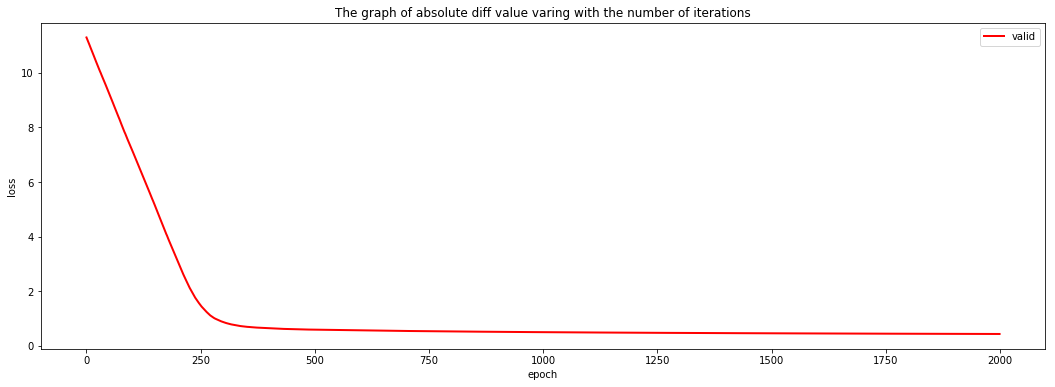

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(18, 6))
plt.plot(losses_val, c='r', linewidth=2, label='valid')
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.title("The graph of absolute diff value varing with the number of iterations")